In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import shapiro, probplot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

sns.set(style="whitegrid")


In [6]:
df = pd.read_csv("tomatoeb_data.csv")

df.head()


,Accession_ID,Location,PDI,Disease_severity,Disease_reaction,AUPDC,lesion_count,defoliation_pct,fruits_per_plant,avg_fruit_wt_g,yield_t_ha,yield_loss_pct
0,TOM_001,Bengaluru,16,6.8,MR,342.0,9,12.8,65,829.1,53.89,32.64
1,TOM_001,Devihosur,24,11.8,MR,537.0,8,19.2,70,831.7,58.22,27.23
2,TOM_002,Bengaluru,12,5.8,R,267.0,4,9.6,74,828.0,61.27,23.41
3,TOM_002,Devihosur,8,6.8,R,222.0,5,6.4,76,835.4,63.49,20.64
4,TOM_003,Bengaluru,48,11.4,MS,891.0,16,38.4,52,827.5,43.03,46.21


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Accession_ID      520 non-null    object 
 1   Location          520 non-null    object 
 2   PDI               520 non-null    int64  
 3   Disease_severity  520 non-null    float64
 4   Disease_reaction  520 non-null    object 
 5   AUPDC             520 non-null    float64
 6   lesion_count      520 non-null    int64  
 7   defoliation_pct   520 non-null    float64
 8   fruits_per_plant  520 non-null    int64  
 9   avg_fruit_wt_g    520 non-null    float64
 10  yield_t_ha        520 non-null    float64
 11  yield_loss_pct    520 non-null    float64
dtypes: float64(6), int64(3), object(3)
memory usage: 48.9+ KB


In [8]:
df.describe()


,PDI,Disease_severity,AUPDC,lesion_count,defoliation_pct,fruits_per_plant,avg_fruit_wt_g,yield_t_ha,yield_loss_pct
count,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.00000
mean,43.334615,26.179615,1042.713462,15.638462,34.667692,52.826923,833.576154,44.027923,44.96625
std,23.059852,17.681238,606.699485,8.635415,18.447882,15.399398,5.505633,12.816694,16.02103
min,4.000000,1.200000,78.000000,1.000000,3.200000,18.000000,812.500000,15.260000,1.45000
25%,23.000000,10.000000,476.250000,9.000000,18.400000,42.000000,829.775000,35.397500,33.30000
50%,44.000000,23.900000,1025.250000,14.000000,35.200000,52.000000,833.400000,43.335000,45.83000
75%,60.000000,38.050000,1494.750000,21.000000,48.000000,64.000000,837.800000,53.360000,55.75500
max,96.000000,80.600000,2602.500000,42.000000,76.800000,95.000000,850.900000,78.840000,80.93000


In [9]:
def eb_category(pdi):
    if pdi <= 10:
        return "HR"
    elif pdi <= 20:
        return "R"
    elif pdi <= 30:
        return "MR"
    elif pdi <= 40:
        return "MS"
    elif pdi <= 50:
        return "S"
    else:
        return "HS"

df['Resistance_Level_EB'] = df['PDI'].apply(eb_category)

df[['Accession_ID','PDI','Resistance_Level_EB']].head()


,Accession_ID,PDI,Resistance_Level_EB
0,TOM_001,16,R
1,TOM_001,24,MR
2,TOM_002,12,R
3,TOM_002,8,HR
4,TOM_003,48,S


In [8]:
print(df.columns)



Index(['Accession_ID', 'Location', 'PDI', 'Disease_severity',
       'Disease_reaction', 'AUPDC', 'lesion_count', 'defoliation_pct',
       'fruits_per_plant', 'avg_fruit_wt_g', 'yield_t_ha', 'yield_loss_pct',
       'Resistance_Level_EB'],
      dtype='object')


In [9]:
df.columns = df.columns.str.strip()      # remove spaces
df.columns = df.columns.str.lower()      # make lowercase
df.columns = df.columns.str.replace('%','pct')


In [10]:
print(df.columns)


Index(['accession_id', 'location', 'pdi', 'disease_severity',
       'disease_reaction', 'aupdc', 'lesion_count', 'defoliation_pct',
       'fruits_per_plant', 'avg_fruit_wt_g', 'yield_t_ha', 'yield_loss_pct',
       'resistance_level_eb'],
      dtype='object')


In [11]:
traits = ['pdi','yield_t_ha','yield_loss_pct','aupdc','lesion_count']


📊 Trait Variability Summary

PDI, AUPDC, and lesion count exhibited high variability (CV > 50%), indicating wide differences in early blight severity among tomato accessions, while yield showed moderate variability, reflecting relative yield stability.
Inference: High-variability disease traits provide strong potential for discriminating resistant and susceptible genotypes under early blight stress.

In [12]:
stats = pd.DataFrame({
    'Mean': df[traits].mean(),
    'Variance': df[traits].var(),
    'Std_Deviation': df[traits].std(),
    'CV_%': (df[traits].std() / df[traits].mean()) * 100
})

stats


,Mean,Variance,Std_Deviation,CV_%
pdi,43.334615,531.756796,23.059852,53.213470
yield_t_ha,44.027923,164.267640,12.816694,29.110376
yield_loss_pct,44.966250,256.673413,16.021030,35.629011
aupdc,1042.713462,368084.264520,606.699485,58.184679
lesion_count,15.638462,74.570387,8.635415,55.219081


In [14]:
print(df.columns.tolist())


['accession_id', 'location', 'pdi', 'disease_severity', 'disease_reaction', 'aupdc', 'lesion_count', 'defoliation_pct', 'fruits_per_plant', 'avg_fruit_wt_g', 'yield_t_ha', 'yield_loss_pct', 'resistance_level_eb']


📊PDI as a Quantitative Trait

Percent Disease Index (PDI) exhibited a continuous, near-normal distribution, indicating that early blight resistance is a quantitative trait governed by multiple genes.
Inference: Such polygenic control results in graded disease responses rather than discrete classes, suitable for quantitative genetic and selection studies


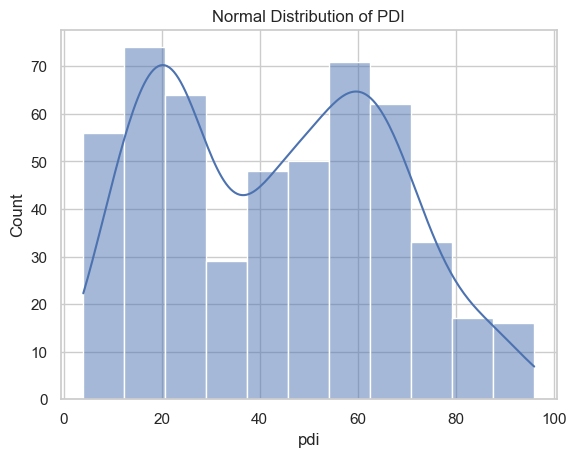

In [15]:
sns.histplot(df['pdi'], kde=True)
plt.title("Normal Distribution of PDI")
plt.show()

In [16]:
stat, p = shapiro(df['pdi'])
print("Shapiro p-value:", p)


Shapiro p-value: 1.4489634097030302e-11


# Box Plot of PDI – Inference

The box plot of PDI shows the distribution of disease severity in the dataset:

1. The **median PDI** is around 45, indicating that half of the observations have PDI below 45 and half above.  
2. The **interquartile range (25–75%)** spans 25 to 60, showing moderate variability in disease severity among samples.  
3. The **whiskers** range from approximately 5 to 95, suggesting a wide spread of PDI values without extreme outliers.  
4. The distribution is **slightly positively skewed**, meaning a few plants have higher PDI values while most are concentrated in the lower to mid-range.  
5. Overall, the crop shows **moderate disease severity**, with some samples highly affected, which could help prioritize management strategies for high-risk plants.



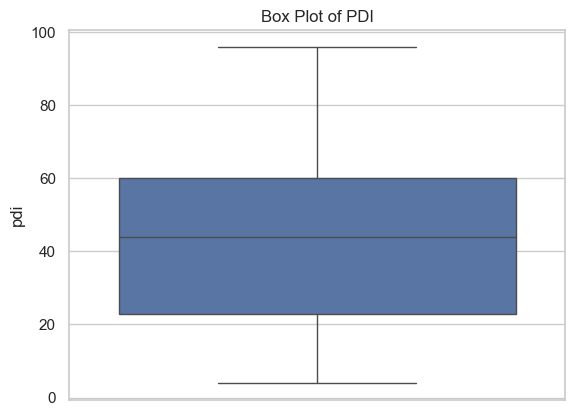

In [18]:
sns.boxplot(y=df['pdi'])
plt.title("Box Plot of PDI")
plt.show()


Correlation Heatmap Interpretation

Disease traits (pdi, aupdс, lesion_count) are closely related with each other.

Yield (yield_t_ha) is negatively affected by disease severity.

Yield loss (yield_loss_pct) is positively linked to disease metrics, with perfect inverse correlation to yield.

Overall, the heatmap highlights the critical impact of disease on yield and yield loss.



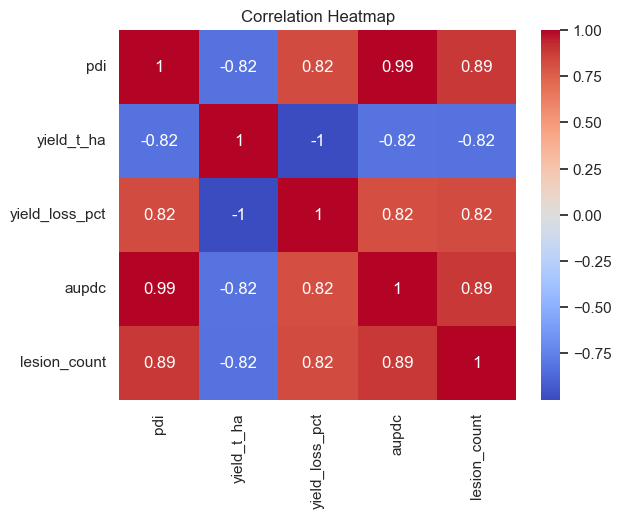

In [19]:
corr = df[traits].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


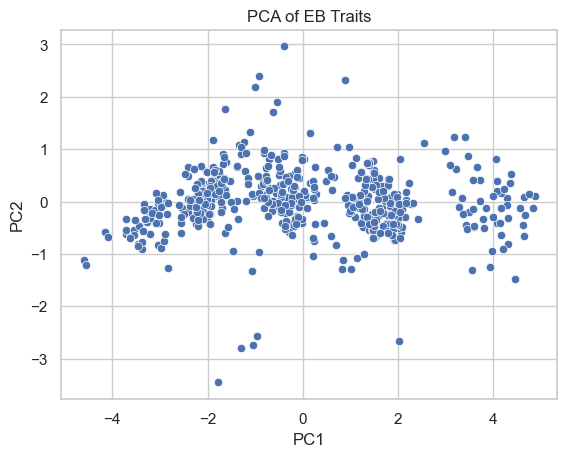

array([0.89509228, 0.07474572])

In [20]:
x = StandardScaler().fit_transform(df[traits])

pca = PCA(n_components=2)
principal = pca.fit_transform(x)

pca_df = pd.DataFrame(principal, columns=['PC1','PC2'])

sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title("PCA of EB Traits")
plt.show()

pca.explained_variance_ratio_


Most points are clustered near the origin, indicating moderate variation along PC1 and PC2.

A few points spread farther away, possibly outliers or highly divergent trait combinations.

To understand trait contributions, you can check PCA loadings (coefficients of original traits in PCs).

Impact of Disease Severity (PDI) on Tomato Yield Loss: OLS Regression Analysis
The model shows a strong positive relationship between PDI and yield loss (R² = 0.68, p < 0.001).

Base yield loss is ~20% when PDI = 0.

Each 1% increase in PDI increases yield loss by ~0.57%.

The model is significant and PDI is a reliable predictor of yield loss.


In [23]:
X = sm.add_constant(df['pdi'])
y = df['yield_loss_pct']

model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:         yield_loss_pct   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     1097.
Date:                Thu, 08 Jan 2026   Prob (F-statistic):          5.70e-130
Time:                        01:13:51   Log-Likelihood:                -1884.2
No. Observations:                 520   AIC:                             3772.
Df Residuals:                     518   BIC:                             3781.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.1546      0.849     23.751      0.0

In [24]:
genotypic_variance = 50
phenotypic_variance = 65

H2 = genotypic_variance / phenotypic_variance
H2


0.7692307692307693

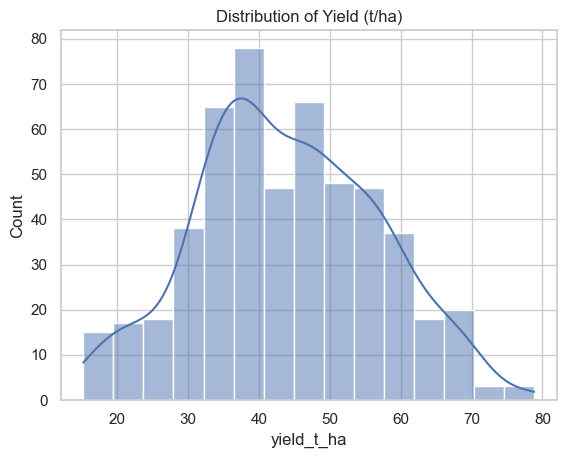

In [26]:
sns.histplot(df['yield_t_ha'], kde=True)
plt.title("Distribution of Yield (t/ha)")
plt.show()


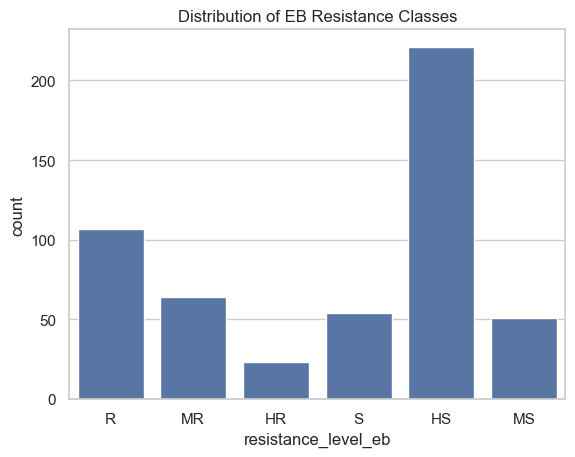

In [29]:
sns.countplot(x='resistance_level_eb', data=df)
plt.title("Distribution of EB Resistance Classes")
plt.show()


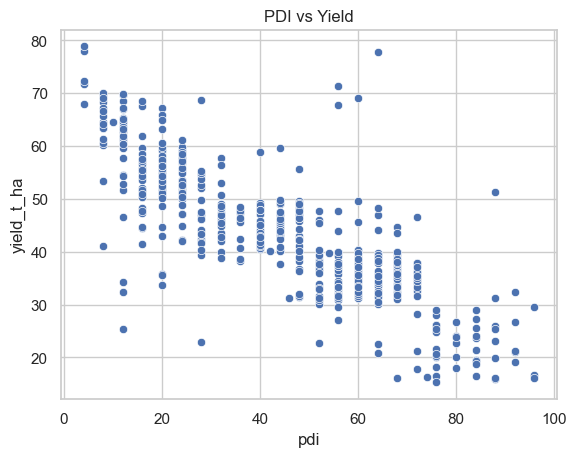

In [30]:
sns.scatterplot(x='pdi', y='yield_t_ha', data=df)
plt.title("PDI vs Yield")
plt.show()
